# Introduction to Data Science
## Homework 3

Student Name: Sanjay Subramanian

Student Netid: ss14383
***

### Part 1 (5 Points)
Assume that $X$ and $Y$ are discrete random variables. The formulas for Mutual Information, Entropy and Conditional Entropy are given by:

$$\text{Mutual Information} = \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log\frac{p(x, y)}{p(x)p(y)}$$

$$\text{Entropy} = H(Y) = -\sum_{y \in Y} p(y) \cdot log(p(y))$$

$$\text{Conditional Entropy} = H(Y \mid X) = \sum_{x \in X} p(x) \cdot H(Y \mid X = x)$$

Show mathematically that $\text{Mutual Information} = \text{Information Gain}$, where $\text{Information Gain} = H(Y) – H(Y \mid X)$. Give the derivation below (note, this can be done using Latek math notation, which renders nicely. See above. Feel free to do it by hand and submit an image of your proof).

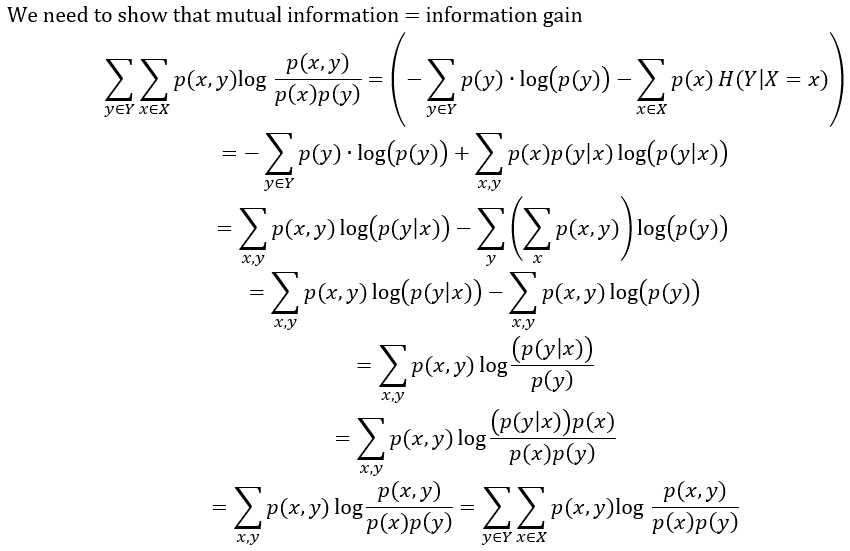

In [269]:
from IPython.display import Image
Image(filename='image.png')

### Part 2 - Preparing a Training Set and Training a Decision Tree (10 Points)
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function in numpy but DO NOT use the data splitting functions from Sklearn.

In [135]:
import pandas as pd
import numpy as np

names = ["revenue", "outcalls", "incalls", "months", "eqpdays", "webcap", "marryyes", "travel", "pcown", "creditcd", "retcalls", "churndep"]
cell = pd.read_csv('cell2cell_data.csv', header = None, names = names)

train_df = cell.sample(frac = 0.8) 
test_df = cell.drop(train_df.index)

2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

In order to show that the data is indeed randomly sampled, we can repeat the sampling process a number of times, collecting our indices each time, and then showing that they exist on a uniform distribution e.g. the probability of choosing any given value across the distribution is equal. Another critical part of this is it allows us to eliminate selection bias from the equation, as we will know our data is truly randomly sampled and uniformly distributed.

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

In [136]:
from sklearn.tree import DecisionTreeClassifier

churn = train_df['churndep']
train = train_df.drop('churndep', 1)

dt = DecisionTreeClassifier(criterion = 'entropy')
dt = dt.fit(train, churn)

4\. Using the resulting model from 2.3, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!). Make sure the bar plot is sorted by increasing feature importance values.

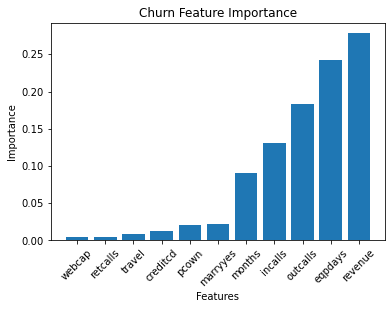

In [137]:
import matplotlib.pyplot as plt
%matplotlib inline

features = dt.feature_importances_

df = {'Features':names[:11], 'Importance':features}
featuresort = pd.DataFrame(df)
featuresort = featuresort.sort_values('Importance')

plt.bar(featuresort.Features, featuresort.Importance)
plt.xticks(rotation = 45)
plt.xlabel('Features'), plt.ylabel('Importance'), plt.title('Churn Feature Importance')
plt.show()

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome? What "real-life" connection can you draw between each variable and churn? Make sure to state your answer, and not just show code.

In [268]:
print ('The top 3 most important features are outcalls, eqpdays, and revenue')

print ('Correlation between revenue and churn is ', np.corrcoef(train_df.revenue, train_df.churndep)[0][1])
print ('Correlation between eqpdays and churn is ', np.corrcoef(train_df.eqpdays, train_df.churndep)[0][1])
print ('Correlation between outcalls and churn is ', np.corrcoef(train_df.outcalls, train_df.churndep)[0][1])

The top 3 most important features are outcalls, eqpdays, and revenue
Correlation between revenue and churn is  -0.015105943543425555
Correlation between eqpdays and churn is  0.11496135409987554
Correlation between outcalls and churn is  -0.037641870688892826


The relationships of revenue and outcalls with churn are negative, while the relationship between eqpdays and churn is positive. While the magnitude of these correlations is generally low, there may be some insights to be drawn.

Mean monthly revenue, or the amount of revenue being generated for the company by a certain customer, may be low for a number of reasons. An observation we might make is that the company may not pay as much attention to a consumer not generating much revenue, which in turn leads to churn. This makes sense given the negative correlation.

In the case of eqpdays, it makes sense that customers may be more likely to churn when the life cycle of the product they are using runs its course, as they may find the time to be ideal for an upgrade. This is reflected by the positive correlation between eqpdays and churn.

Lastly, people tending to make fewer calls could tend towards churning as they recognize they no longer need the service. This explains the negative correlation between number of outbound calls and churn. 

6\. Using the classifier built in 2.3, try predicting "churndep" on both the train_df and test_df data sets. What is the accuracy on each? What is your explanation on the difference (or lackthereof) between the two accuracies?

In [208]:
from sklearn import metrics

print('Accuracy for train_df =', dt.score(train_df[names[:11]],train_df.churndep))
print('Accuracy for test_df =', dt.score(test_df[names[:11]],test_df.churndep))

Accuracy for train_df = 0.9997804748016433
Accuracy for test_df = 0.5332413447064727


The accuracies between the training set and test set are vastly different, and this makes sense given the way the data was sampled, with 80% of the original dataset belonging to the training data and only 20% being used for testing. Despite this, accuracy on the test data exceeded 50%, showing a reasonable model fit on the training data. 

### Part 3 - Finding a Good Decision Tree (10 Points)
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters mim_samples_split and min_samples_leaf. 

In [266]:
#samples_split from 100 to 4000
min_samples_split_values = np.arange(100,4100,400)
#leaf size from 1 to 512 as a geometric series
min_samples_leaf_values = np.geomspace(1, 513, num = 10, dtype = int)

2\. Explain in words your reasoning for choosing the above ranges.

Due to the number of samples in the dataset (~40000), min split size should not be too small so as to avoid overfitting. We also need to ensure they are not too large, to avoid underfitting. In testing different ranges, it appeared this range worked the best in order to maximize accuracy before it began to level off. Like in the case of split size, we want to make sure we avoid overfitting with regard to min leaf size, so the range was chosen here varying from small to large sizes to observe the impact small leaves have on accuracy. 

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

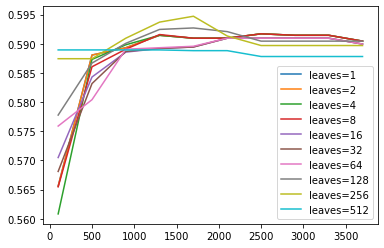

In [267]:
import matplotlib.pyplot as plt
%matplotlib inline

#function to run decision tree accuracy on a test set given min split size and min leaf size
def dtaccuracy(train, trainfit, test, testfit, min_split, min_leaf):
    dt = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = min_split, min_samples_leaf = min_leaf)
    dt = dt.fit(train, trainfit)
    return dt.score(test, testfit)

#empty list to store 100 values for all combinations of split size and leaf size
res = list()
for i in range(len(min_samples_split_values)):
    res.append(list())

#running decision tree accuracy for each pairing
for s in min_samples_split_values:
    for l, i in zip(min_samples_leaf_values, range(len(min_samples_leaf_values))):
        res[i].append(dtaccuracy(train, churn, test_df[names[:11]], test_df.churndep, s, l))

#plotting split size vs. accuracy as in terms of min leaf size
for i in range(len(min_samples_split_values)):
    plt.plot(min_samples_split_values, res[i], label = 'leaves={}'.format(min_samples_leaf_values[i]))
#plt.legend(bbox_to_anchor=(1.5, 1),loc = 10)
plt.legend(loc = "lower right")

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values), and reassess your answer in Q3.2.

A min split size of around 1500 with a min leaf size around 250-260 seemed to provide the best result in terms of accuracy, as shown by the green line in the plot, which maxes out at an accuracy close to 0.6. This is an improvement on the accuracy using the default parameters from Part 2 (0.53).  

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

We can call churn the rate at which customers stop engaging in business with an entity. The goal of such a model should be to isolate those features that are most likely to lead to churn, and create campaigns to specifically tackle the churn question from these angles. This will enhance specificity and potentially lead to reduced operating costs. A minimization of churn will generally lead to increased revenue, and rather than arbitrarily target certain demographics with advertising campaigns or promotions, this model allows us to target features such as outcalls, revenue, and eqpdays that have the highest effect on churn. 

An example of an outcome of this model in the call2call example would be creating a discount campaign on newer devices for those with old models, as expressed by the eqpdays feature. A trade-in program like Apple's may lead to lower churn from this demographic. Another example would be to maybe make international calls free in order to improve desirability for customers making a lot of international calls. These and other focused ideas could directly lead to churn reduction while avoiding costs that would otherwise incur with more broadly-focused campaigns.